In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/unnati_phase1_data_revised.csv')

In [ ]:
df

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58
...,...,...,...,...,...,...,...
21320,cas_pcw,2022-08-31,18:12:29,13.070668,80.265539,5339,30
21321,cas_pcw,2022-08-31,18:13:01,13.071554,80.264616,5339,34
21322,cas_hmw,2022-08-31,18:15:05,13.071181,80.258729,5339,24
21323,cas_pcw,2022-08-31,18:16:35,13.067723,80.255065,5339,23


In [ ]:
df1 = df

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import folium


coordinates = df1[['Lat', 'Long']].values

clustering = DBSCAN(eps=0.011, min_samples=2).fit(coordinates)
df1['Cluster'] = clustering.labels_

cluster_alerts = df1.groupby('Cluster')['Alert'].agg(lambda x: x.value_counts().idxmax())

colors = {
    'cas_ldw': 'red',
    'cas_hmw': 'blue',
    'cas_pcw': 'green',
    'cas_fcw': 'purple'
}

m = folium.Map(location=[df1['Lat'].mean(), df1['Long'].mean()], zoom_start=14)

for cluster, alert_type in cluster_alerts.items():
    cluster_data = df1[df1['Cluster'] == cluster]
    lat, lon = cluster_data['Lat'].mean(), cluster_data['Long'].mean()

    folium.CircleMarker(
        location=[lat, lon],
        radius=10,
        color=colors.get(alert_type, 'gray'),
        fill=True,
        fill_color=colors.get(alert_type, 'gray'),
        fill_opacity=1,
        popup=f'Most Common Alert Type: {alert_type}, Cluster Size: {len(cluster_data)}'
    ).add_to(m)

legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 120px; height: 120px;
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     ">&nbsp; Legend <br>
     &nbsp; cas_ldw &nbsp; <i class="fa fa-circle fa-1x" style="color:red"></i><br>
     &nbsp; cas_hmw &nbsp; <i class="fa fa-circle fa-1x" style="color:blue"></i><br>
     &nbsp; cas_pcw &nbsp; <i class="fa fa-circle fa-1x" style="color:green"></i><br>
     &nbsp; cas_fcw &nbsp; <i class="fa fa-circle fa-1x" style="color:purple"></i><br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

m


In [ ]:
m.save('main_alert_map_clustered_with _less_dist.html')

<ipython-input-8-2bff07c598b1>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  alert_counts = df1.groupby([df1['Date'].dt.week, 'Alert']).size().unstack().fillna(0)


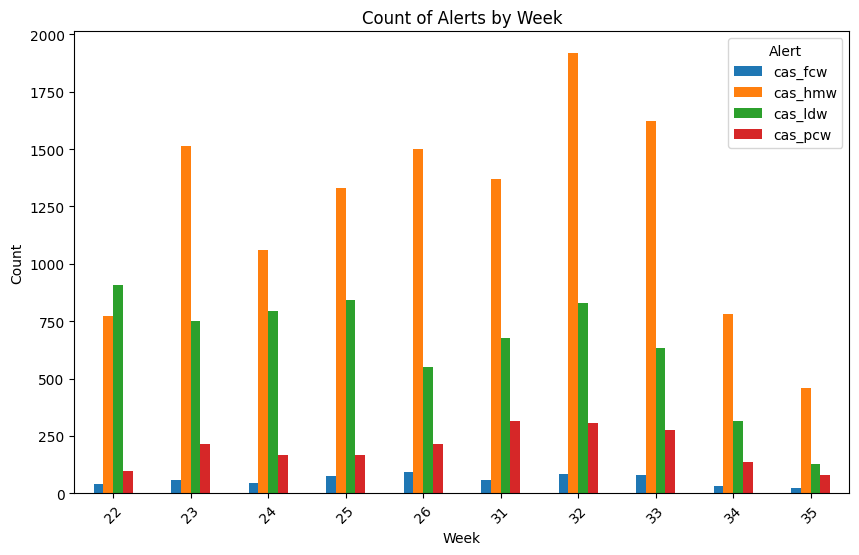

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

alert_counts = df1.groupby([df1['Date'].dt.week, 'Alert']).size().unstack().fillna(0)

alert_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Alerts by Week')
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

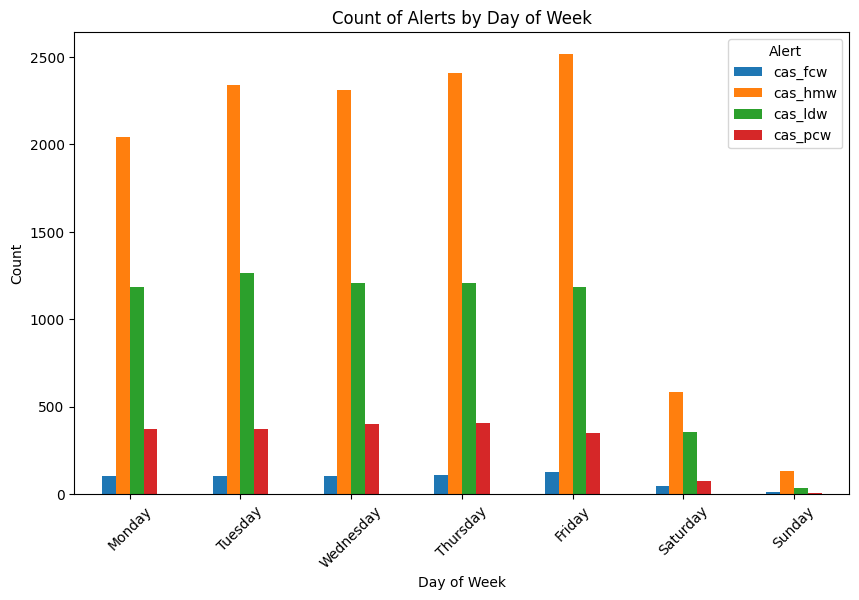

In [ ]:
alert_counts = df1.groupby([df1['Date'].dt.day_name(), 'Alert']).size().unstack().fillna(0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
alert_counts = alert_counts.reindex(days_order, axis=0, fill_value=0)

alert_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Alerts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


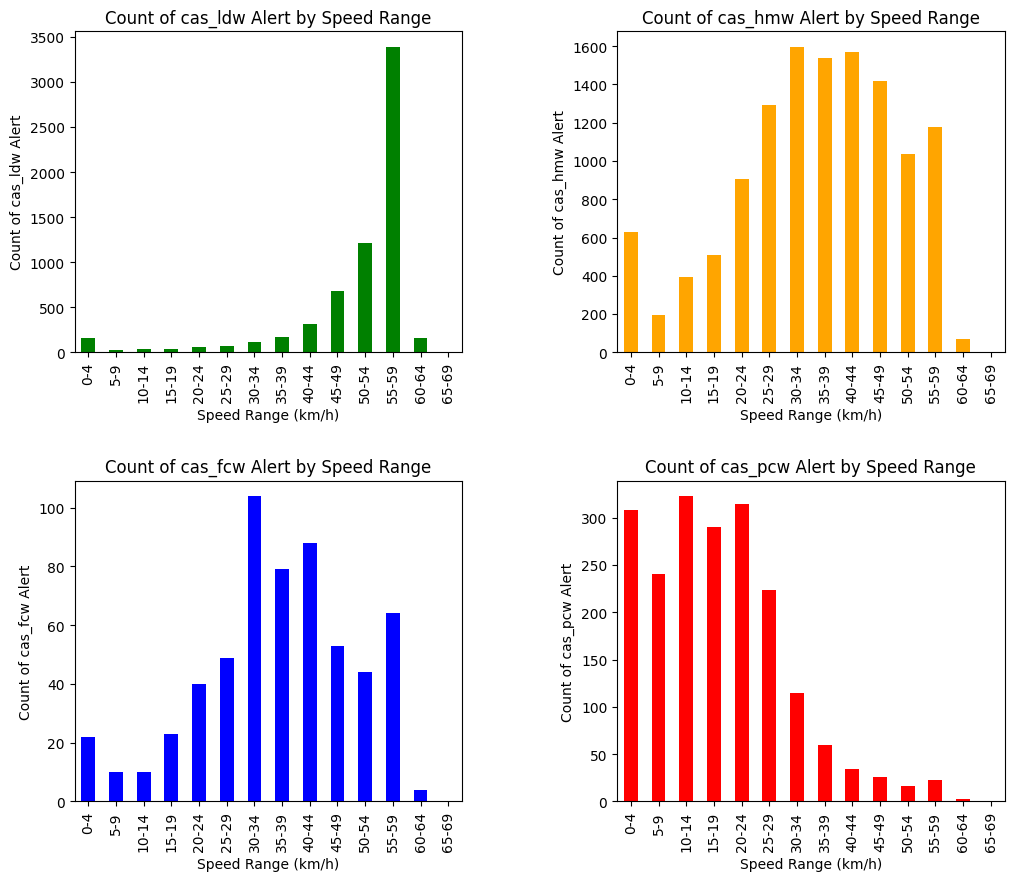

In [ ]:
bins = range(0, 71, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df1['Speed Range'] = pd.cut(df1['Speed'], bins=bins, labels=labels, right=False)

speed_alert_counts = df1.groupby(['Speed Range', 'Alert']).size().unstack(fill_value=0)

error_types = df1['Alert'].unique()

colors = {
    'cas_ldw': 'Green',
    'cas_hmw': 'Orange',
    'cas_pcw': 'Red',
    'cas_fcw': 'Blue'
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
axes = axes.flatten()

for i, error_type in enumerate(error_types):
    error_counts = speed_alert_counts[error_type]
    ax = axes[i]
    error_counts.plot(kind='bar', ax=ax, color=colors[error_type])
    ax.set_title(f'Count of {error_type} Alert by Speed Range')
    ax.set_xlabel('Speed Range (km/h)')
    ax.set_ylabel(f'Count of {error_type} Alert')
    ax.set_xticklabels(labels, rotation=90)

plt.show()

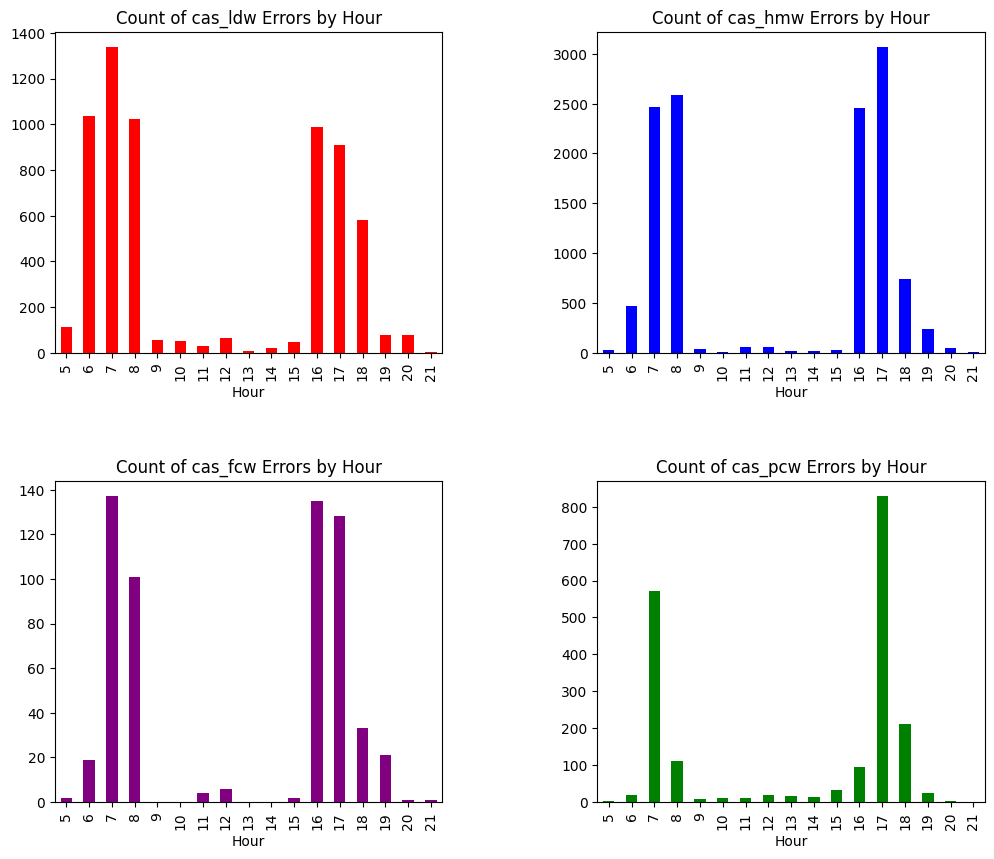

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1['Hour'] = pd.to_datetime(df1['Time']).dt.hour

bins = range(1, 25)

hourly_alert_counts = df1.groupby(['Hour', 'Alert']).size().unstack(fill_value=0)

error_types = df1['Alert'].unique()

colors = {
    'cas_ldw': 'red',
    'cas_hmw': 'blue',
    'cas_pcw': 'green',
    'cas_fcw': 'purple'
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
axes = axes.flatten()

for i, error_type in enumerate(error_types):
    alert_counts = hourly_alert_counts[error_type]
    ax = axes[i]
    alert_counts.plot(kind='bar', ax=ax, color=colors[error_type])
    ax.set_title(f'Count of {error_type} Errors by Hour')
plt.show()


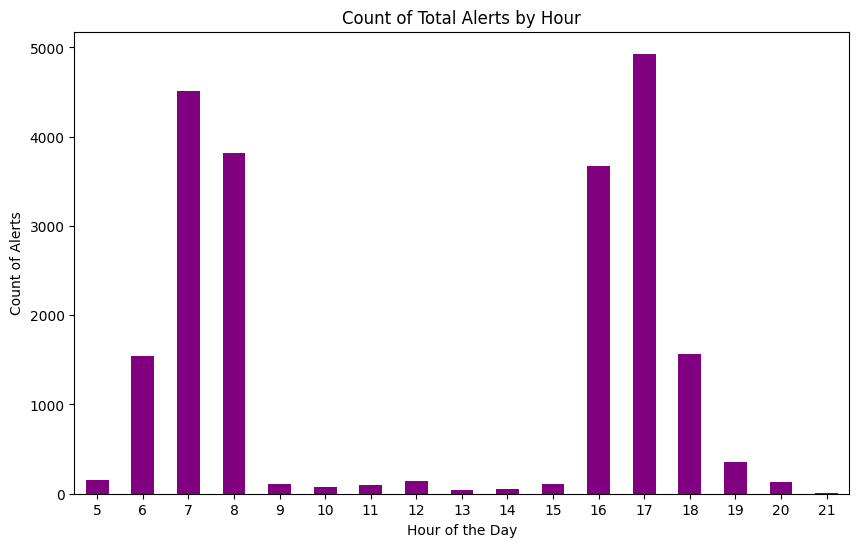

In [ ]:
df1['Hour'] = pd.to_datetime(df1['Time']).dt.hour

hourly_alert_counts = df1.groupby('Hour').size()

plt.figure(figsize=(10, 6))
hourly_alert_counts.plot(kind='bar', color='purple')

plt.title('Count of Total Alerts by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Alerts')
plt.xticks(rotation=0)
plt.show()


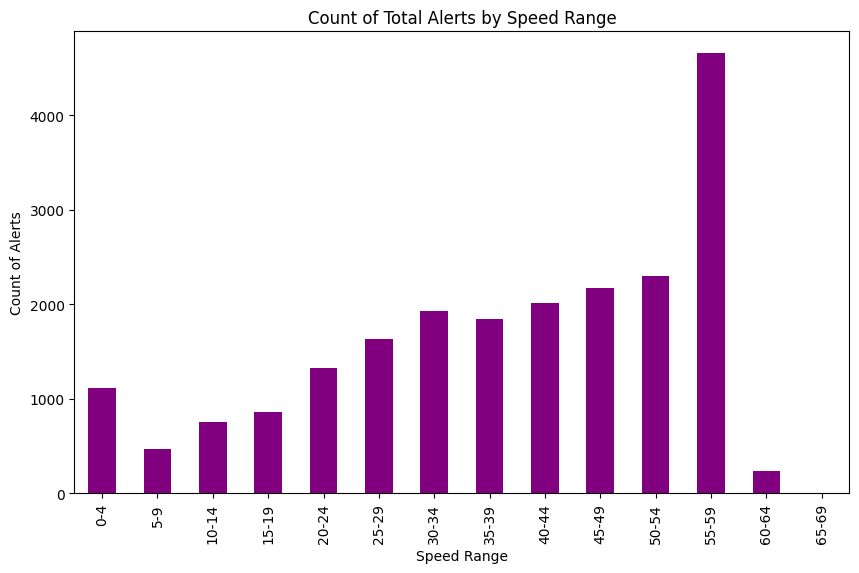

In [ ]:
hourly_alert_counts = df1.groupby('Speed Range').size()

plt.figure(figsize=(10, 6))
hourly_alert_counts.plot(kind='bar', color='purple')

plt.title('Count of Total Alerts by Speed Range')
plt.xlabel('Speed Range')
plt.ylabel('Count of Alerts')
plt.show()


In [ ]:
df

,Alert,Date,Time,Lat,Long,Vehicle,Speed,Cluster,Speed Range,Hour
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48,0,45-49,5
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58,0,55-59,5
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57,0,55-59,5
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49,0,45-49,5
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58,0,55-59,5
...,...,...,...,...,...,...,...,...,...,...
21320,cas_pcw,2022-08-31,18:12:29,13.070668,80.265539,5339,30,0,30-34,18
21321,cas_pcw,2022-08-31,18:13:01,13.071554,80.264616,5339,34,0,30-34,18
21322,cas_hmw,2022-08-31,18:15:05,13.071181,80.258729,5339,24,0,20-24,18
21323,cas_pcw,2022-08-31,18:16:35,13.067723,80.255065,5339,23,0,20-24,18


In [ ]:
df[df['Alert']=='cas_ldw'].to_csv('cas_ldw.csv', index=False)

In [ ]:
df[df['Alert']=='cas_hmw'].to_csv('cas_hmw.csv', index=False)

In [ ]:
df[df['Alert']=='cas_pcw'].to_csv('cas_pcw.csv', index=False)

In [ ]:
df[df['Alert']=='cas_fcw'].to_csv('cas_fcw.csv', index=False)